In [1]:
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
import metpy.plots as mpplots
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from siphon.catalog import TDSCatalog
from netCDF4 import num2date
from datetime import datetime, timedelta
import xarray as xr
from scipy.ndimage import gaussian_filter

C:\Users\Tony\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
def find_time_var(var, time_basename='time'):
    for coord_name in var.coordinates.split():
        if coord_name.startswith(time_basename):
            return coord_name
    raise ValueError('No time variable found for ' + var.name)

In [3]:
tds_RAP=TDSCatalog(f'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/RAP/CONUS_13km/latest.html')
rap_ds=tds_RAP.datasets[0]
ds=xr.open_dataset(rap_ds.access_urls['OPENDAP'])
ds=ds.isel(time=0)
ds=ds.isel(time1=0)
#print(ds)
#print(ds['isobaric'].values)
ds_parsed = ds.metpy.parse_cf()
print(ds_parsed.variables)

C:\Users\Tony\anaconda3\lib\site-packages\siphon\catalog.py:292: UserWarning: URL https://thredds.ucar.edu/thredds/catalog/grib/NCEP/RAP/CONUS_13km/latest.html returned HTML. Changing to: https://thredds.ucar.edu/thredds/catalog/grib/NCEP/RAP/CONUS_13km/latest.xml
  warnings.warn('URL {} returned HTML. Changing to: {}'.format(self.catalog_url,
C:\Users\Tony\anaconda3\lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfradial1' loading failed:
module 'numpy' has no attribute 'typeDict'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
C:\Users\Tony\anaconda3\lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'furuno' loading failed:
module 'numpy' has no attribute 'typeDict'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
C:\Users\Tony\anaconda3\lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'gamic' loading failed:
module 'numpy' has no attribute 'typeDict'
  warnings.w

Frozen({'reftime': <xarray.Variable ()>
array('2024-01-23T20:00:00.000000000', dtype='datetime64[ns]')
Attributes:
    standard_name:        forecast_reference_time
    long_name:            GRIB reference time
    _CoordinateAxisType:  RunTime, 'time': <xarray.Variable ()>
array('2024-01-23T21:00:00.000000000', dtype='datetime64[ns]')
Attributes:
    standard_name:        time
    long_name:            GRIB forecast or observation time
    bounds:               time_bounds
    _CoordinateAxisType:  Time, 'time1': <xarray.Variable ()>
array('2024-01-23T20:00:00.000000000', dtype='datetime64[ns]')
Attributes:
    standard_name:        time
    long_name:            GRIB forecast or observation time
    _CoordinateAxisType:  Time, 'LambertConformal_Projection': <xarray.Variable ()>
[1 values with dtype=int32]
Attributes:
    grid_mapping_name:              lambert_conformal_conic
    latitude_of_projection_origin:  25.0
    longitude_of_central_meridian:  265.0
    standard_parallel:    

In [6]:
u = ds_parsed['u-component_of_wind_isobaric'].sel(isobaric=85000).metpy.convert_units('m/s')
v = ds_parsed['v-component_of_wind_isobaric'].sel(isobaric=85000).metpy.convert_units('m/s')
gph = ds_parsed['Geopotential_height_isobaric'].sel(isobaric=85000)

u = u.values
v = v.values
gph = gph.values
x = ds_parsed['x'].values
y = ds_parsed['y'].values

x_m = 13e5
y_m = 13e5

print(u, v)

du_dx, du_dy = np.gradient(u, axis=(1, 0))
dv_dx, dv_dy = np.gradient(v, axis=(1, 0))

deformation = np.sqrt((du_dx + dv_dy)**2 + (du_dx - dv_dy)**2)
print(deformation)
mSLP=ds.metpy.parse_cf('MSLP_MAPS_System_Reduction_msl').metpy.convert_units('hPa')

time_ds = ds.time.values
formatted_time = time_ds.astype('datetime64[s]').astype(datetime).strftime('%Y-%m-%d %H:%M:%S')

[[ -8.942093  -8.754593  -8.629593 ... -13.629593 -13.504593 -13.379593]
 [ -8.942093  -8.754593  -8.692093 ... -13.879593 -13.817093 -13.692093]
 [ -8.817093  -8.629593  -8.504593 ... -14.254593 -14.254593 -14.192093]
 ...
 [  3.870407   3.620407   3.432907 ...  17.620407  17.682907  17.682907]
 [  3.057907   2.870407   2.807907 ...  17.120407  17.182907  17.182907]
 [  2.370407   2.245407   2.307907 ...  16.620407  16.682907  16.682907]] [[-1.1409168  -1.0159168  -0.8909168  ... -0.20341682 -0.20341682
  -0.32841682]
 [-1.2659168  -1.2034168  -1.0784168  ... -0.32841682 -0.45341682
  -0.5784168 ]
 [-1.1409168  -1.1409168  -1.0784168  ... -0.6409168  -0.7034168
  -0.8909168 ]
 ...
 [ 5.921583    5.671583    5.359083   ... -6.765917   -6.703417
  -6.703417  ]
 [ 5.921583    5.609083    5.171583   ... -6.578417   -6.515917
  -6.453417  ]
 [ 5.859083    5.359083    4.859083   ... -6.515917   -6.390917
  -6.265917  ]]
[[0.31868872 0.34516752 0.31868872 ... 0.25       0.3952847  0.3952847 

C:\Users\Tony\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1614: UserWarning: No contour levels were found within the data range.
  result = super().contour(*args, **kwargs)


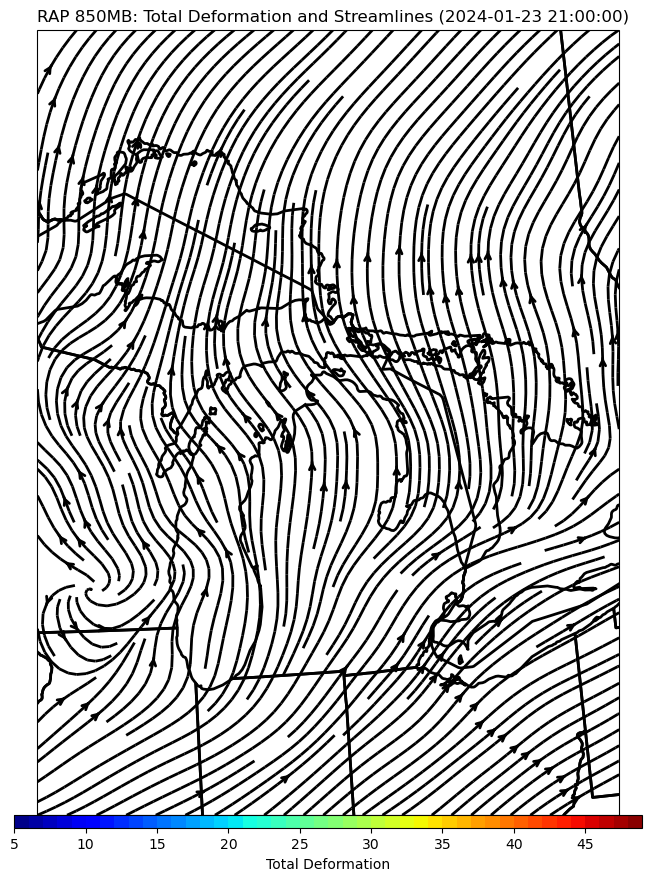

In [7]:
mapcrs = ccrs.LambertConformal(central_longitude=-98, central_latitude=39)
datacrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(1, 1, 1,projection=mSLP.metpy.cartopy_crs)

ax.set_extent([-90, -80, 40, 50], datacrs)

ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=2)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=2)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='black', linewidth=2)

cf = ax.contourf(ds.x, ds.y, mpcalc.smooth_gaussian(deformation,3), range(5,50,1), cmap='jet', zorder=2)
plt.colorbar(cf, orientation='horizontal', pad=0, aspect=50, label='Total Deformation', shrink=0.45)
c = ax.contour(ds.x, ds.y, mpcalc.smooth_gaussian(deformation,3), range(5,50,1), colors='black', zorder=2)
plt.title(f'RAP 850MB: Total Deformation and Streamlines ({formatted_time})', loc='left')
ax.streamplot(x, y, u, v, color='black', zorder=1, arrowstyle='->', density=2, linewidth=2)
plt.show()